# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

In [2]:
main[main.student_id == '768c2987a744c51ce64a5993a2a94eaf'] # проверка основного датасета

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,course_title,course_field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True
5,a387ab916f402cb3fbfffd29f68fd0ce,2,1,done,2018-06-23 08:18:07.476199+00,2018-06-23 08:18:09.552181+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Брифинг от заказчика,a25caa09-95d0-4e0c-b3c0-ad15f23bead8,True,False
6,a387ab916f402cb3fbfffd29f68fd0ce,1,3,done,2018-06-20 15:58:22.132468+00,2018-06-20 16:00:06.127191+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #1,a3d74174-08be-4634-949a-108d4f915fa6,True,False
7,a387ab916f402cb3fbfffd29f68fd0ce,2,5,start,2018-06-23 08:31:00.338883+00,NaN,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Домашняя работа,90c5f618-e9f3-4af8-96ab-f41b312bfa77,False,True
8,a387ab916f402cb3fbfffd29f68fd0ce,1,2,done,2018-06-20 15:45:07.976223+00,2018-06-20 15:58:21.886722+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Специализация,558acc64-3867-4ada-ac6f-36e9a7922f68,True,False
9,a387ab916f402cb3fbfffd29f68fd0ce,1,5,done,2018-06-21 19:09:31.117521+00,2018-06-21 19:10:36.707919+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашнее задание #2,7ea421f0-04b5-4df8-a76c-03e24692eba9,True,False


Всего 15 курсов
                                     module_number
title                                             
Excel Базовый                                    8
Java-разработчик                                16
Java-разработчик c нуля                          2
JavaScript с нуля                               18
PHP-разработчик с 0 до PRO. Часть 1              8
SMM-маркетолог от А до Я                        10
UX-дизайн                                       20
Анимация интерфейсов                            21
Веб-вёрстка для начинающих 2.0                   8
Веб-дизайн PRO 2.0                              17
Веб-дизайн Базовый                              16
Веб-дизайн с нуля 2.0                           16
Веб-разработчик                                 20
Интернет-маркетолог от Ingate                   18
Руководитель digital-проектов                   17
                                             lesson_number
title                         module_number               

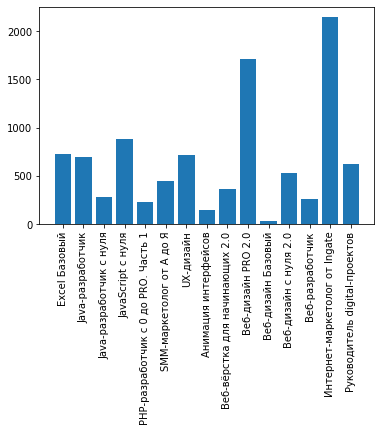

ValueError: Invalid RGBA argument: 't'

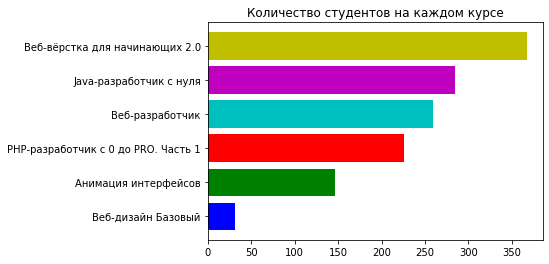

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

course_contents = pd.read_csv("./data_kr/course_contents.csv", encoding="UTF-8")
courses = pd.read_csv("./data_kr/courses.csv", encoding="UTF-8")
progress_phases = pd.read_csv("./data_kr/progress_phases.csv", encoding="UTF-8")
progresses = pd.read_csv("./data_kr/progresses.csv", encoding="UTF-8")
students = pd.read_csv("./data_kr/students.csv", encoding="UTF-8")

progresses = progresses.rename(columns={"id": "progress_id"})
courses = courses.rename(columns={"id": "course_id"})
courses = courses.drop(columns='Unnamed: 0')
students = students.drop(columns='id_')
students = students.dropna(subset=['birthday'])
students = students.rename(columns={"id": "student_id"})

maindat = progress_phases.merge(progresses)
maindat = maindat.merge(courses, on='course_id')
maindat = maindat.merge(course_contents, on=['course_id', 'module_number', 'lesson_number'])
studentsdat = students.merge(progresses, on='student_id')
studentsdat = studentsdat.merge(courses, on='course_id')
conv = maindat

# общее количество курсов
print("Всего {} курсов".format(maindat.drop_duplicates(subset='title')['title'].count())) #результат

# количество модулей на каждом курсе
modules = maindat.drop_duplicates(subset='module_title')
print(modules[['title', 'module_number']].groupby('title').count()) #результат
    
# количество уроков в каждом модуле на каждом курсе
lessons = maindat.drop_duplicates(subset='lesson_title')
print(lessons[['title', 'module_number', 'lesson_number']].groupby(['title', 'module_number']).count()) #результат

# медианное количество уроков в модуле на каждом курсе
lessons_med  = maindat.drop_duplicates(subset='lesson_title')
print(lessons_med[['title', 'lesson_number']].groupby(['title']).agg('median')) #результат

# количество учеников на каждом курсе
studs = maindat.drop_duplicates(subset='student_id')
print(studs[['title', 'student_id']].groupby('title').count()) #результат

# минимальный, максимальный, средний, медианный возраст студентов
students['birthday'] = pd.to_datetime(students['birthday'], errors='coerce')
students = students[(students['birthday'] > '1940-01-01') & (students['birthday'] < '2004-01-01')]
students['age'] = datetime.today() - students['birthday']
ages = students['age'] / np.timedelta64(1,'Y')
print("Минимальный {}, максимальный {}, средний {}, медианный {} возраст среди всех студентов".format(
    ages.min(), ages.max(), ages.mean(), ages.median())) #результат

# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
studentsdat['birthday'] = pd.to_datetime(studentsdat['birthday'], errors='coerce')
studentsdat = studentsdat[['student_id', 'birthday', 'title']]
studentsdat = studentsdat[(studentsdat['birthday'] > '1940-01-01') & (studentsdat['birthday'] < '2004-01-01')]
studentsdat['age'] = datetime.today() - studentsdat['birthday']
studentsdat['age'] = studentsdat['age'] / np.timedelta64(1,'Y')
print(studentsdat[['title', 'age']].groupby(['title']).agg(['min', 'max', 'mean', 'median'])) #результат

# Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
stu = studs[['title', 'student_id']].groupby('title').count().reset_index()
fig, subplot = plt.subplots()
subplot.bar(stu['title'], stu['student_id'])
plt.xticks(rotation='vertical')
plt.show()

# Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart,
# отражающий количество студентов на каждом курсе. График должен иметь заголовок.
# Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере,
# к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1.
# На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
stu_sort = stu.sort_values('student_id')
fig, subplot = plt.subplots()
subplot.set_title('Количество студентов на каждом курсе')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 't|an', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for x, y, c in zip(stu_sort['title'], stu_sort['student_id'], colors):
    subplot.barh(x, y, color=c, label=x)
plt.axvline(stu.agg('median')[0], color='lightpink')
subplot.legend(bbox_to_anchor=(1, 1), framealpha=0.1)
plt.show()

#3
col = maindat[maindat.is_homework == True].dropna()
# На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)
# Средний реальный возраст студентов 28.8 лет. Самый популярный курс "Интернет-маркетолог", наименее популярный "Веб-дизайн базовый".
# Курсы по программированию пользуются меньшей популярностью, чем курсы по дизайну и маркетингу.
# Наиболее интересные направления курсов - дизайн и маркетинг.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

                             title start_date  student_id
0                    Excel Базовый    2018-02           6
1                    Excel Базовый    2018-03           3
244                  Excel Базовый    2018-04           0
2                    Excel Базовый    2018-05           3
3                    Excel Базовый    2018-06           9
..                             ...        ...         ...
239  Руководитель digital-проектов    2019-03          36
240  Руководитель digital-проектов    2019-04          17
241  Руководитель digital-проектов    2019-05          25
242  Руководитель digital-проектов    2019-06          15
243  Руководитель digital-проектов    2019-07          20

[293 rows x 3 columns]
             title start_date  student_id
0    Excel Базовый    2018-02           6
1    Excel Базовый    2018-03           3
244  Excel Базовый    2018-04           0
2    Excel Базовый    2018-05           3
3    Excel Базовый    2018-06           9
4    Excel Базовый    2018-0

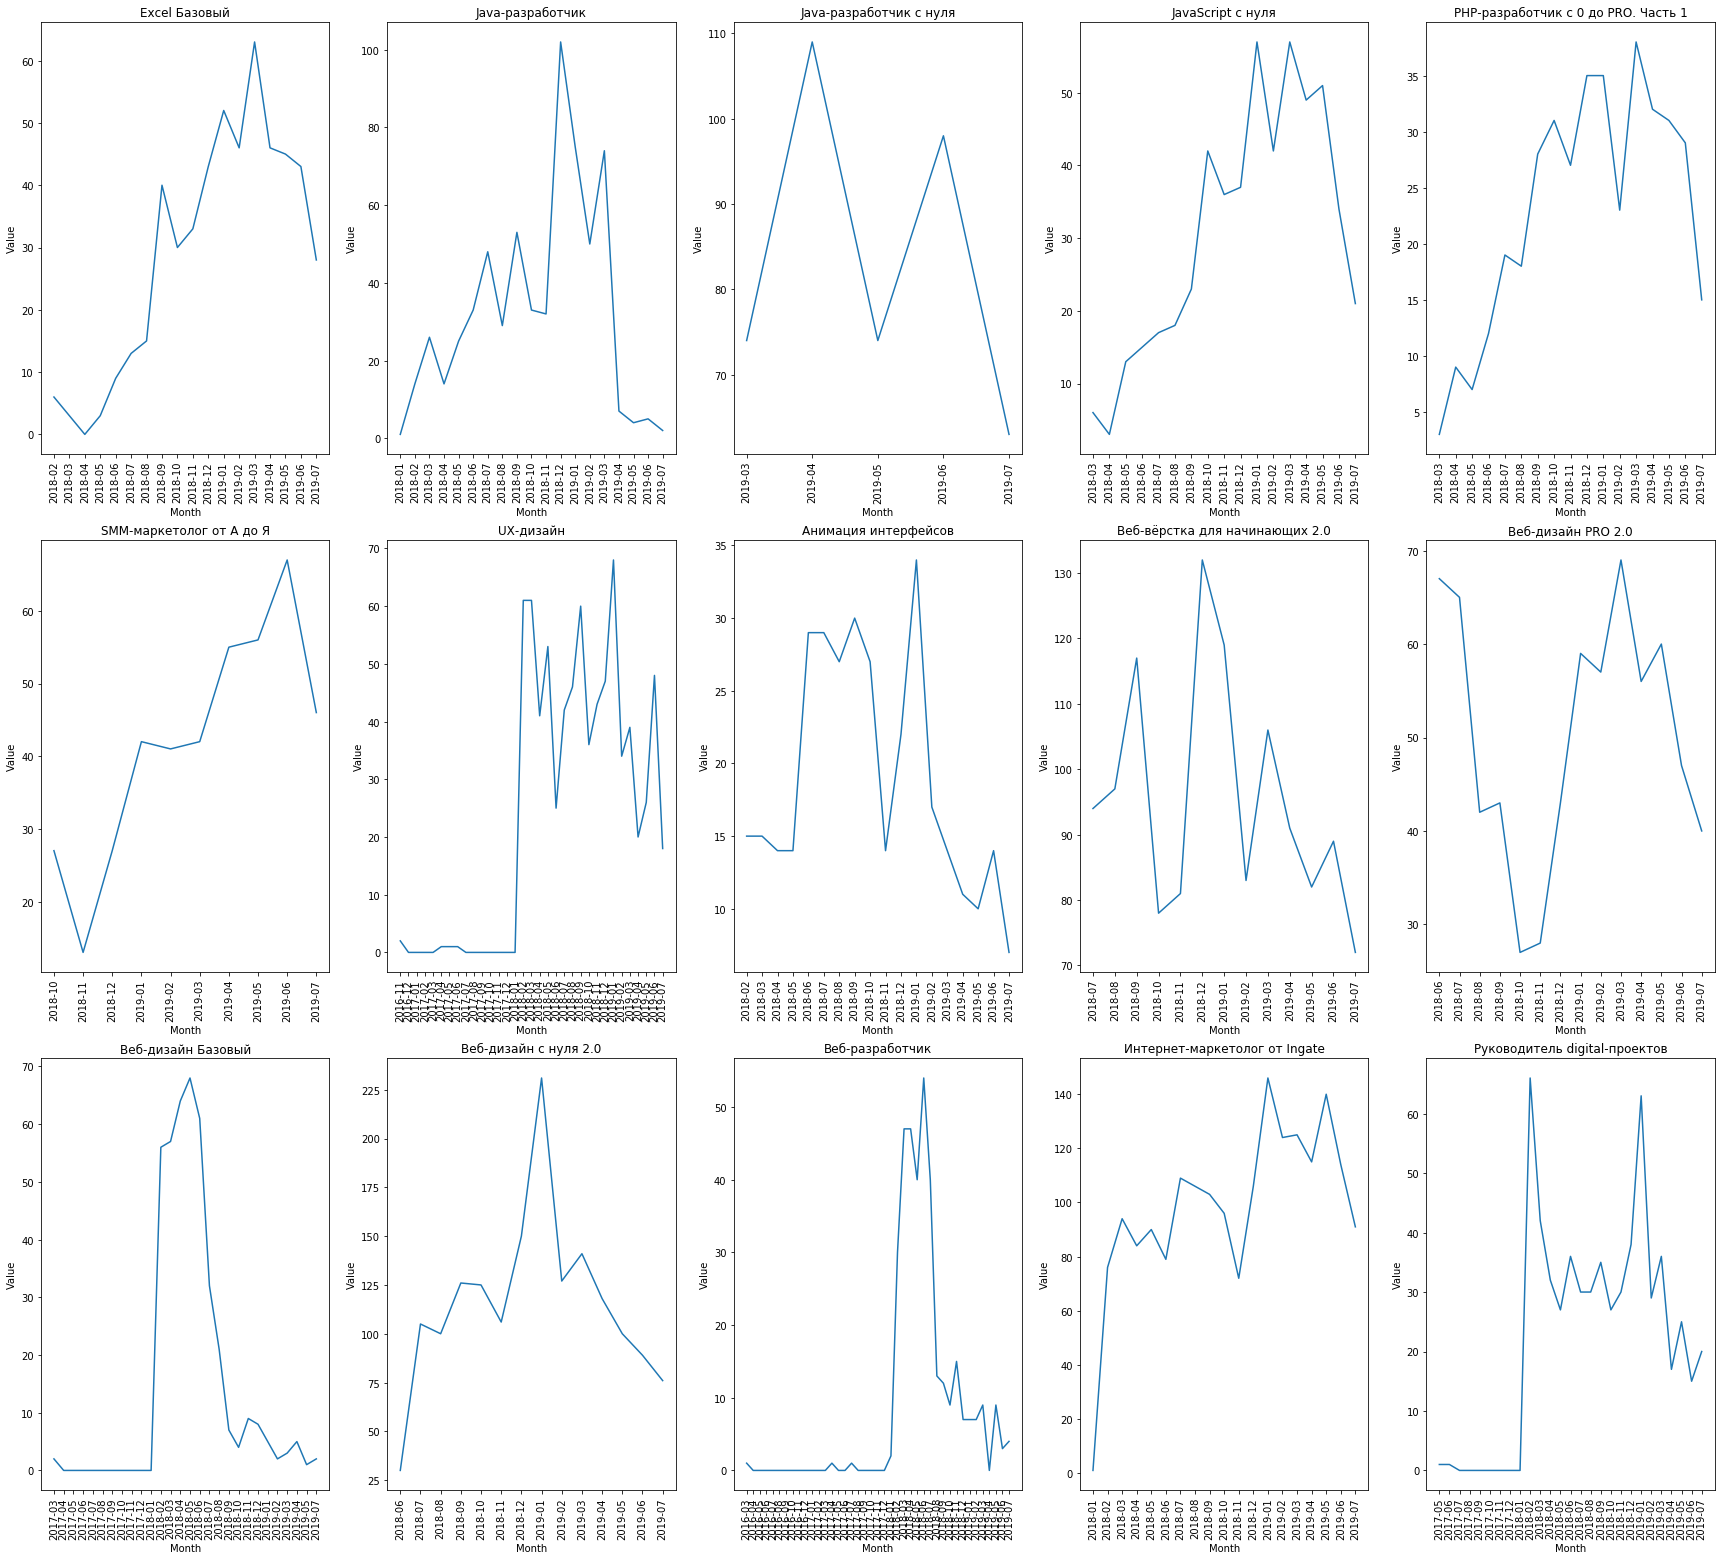

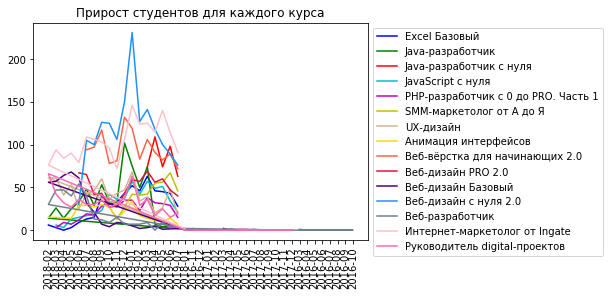

                                          progress_id
title                         start_date             
Excel Базовый                 2018-02              37
                              2018-03               9
                              2018-04              16
                              2018-05              21
                              2018-06              41
...                                               ...
Руководитель digital-проектов 2019-03             407
                              2019-04             354
                              2019-05             390
                              2019-06             373
                              2019-07             379

[356 rows x 1 columns]
                          progress_id
title         start_date             
Excel Базовый 2018-02              37
              2018-03               9
              2018-04              16
              2018-05              21
              2018-06              41
        

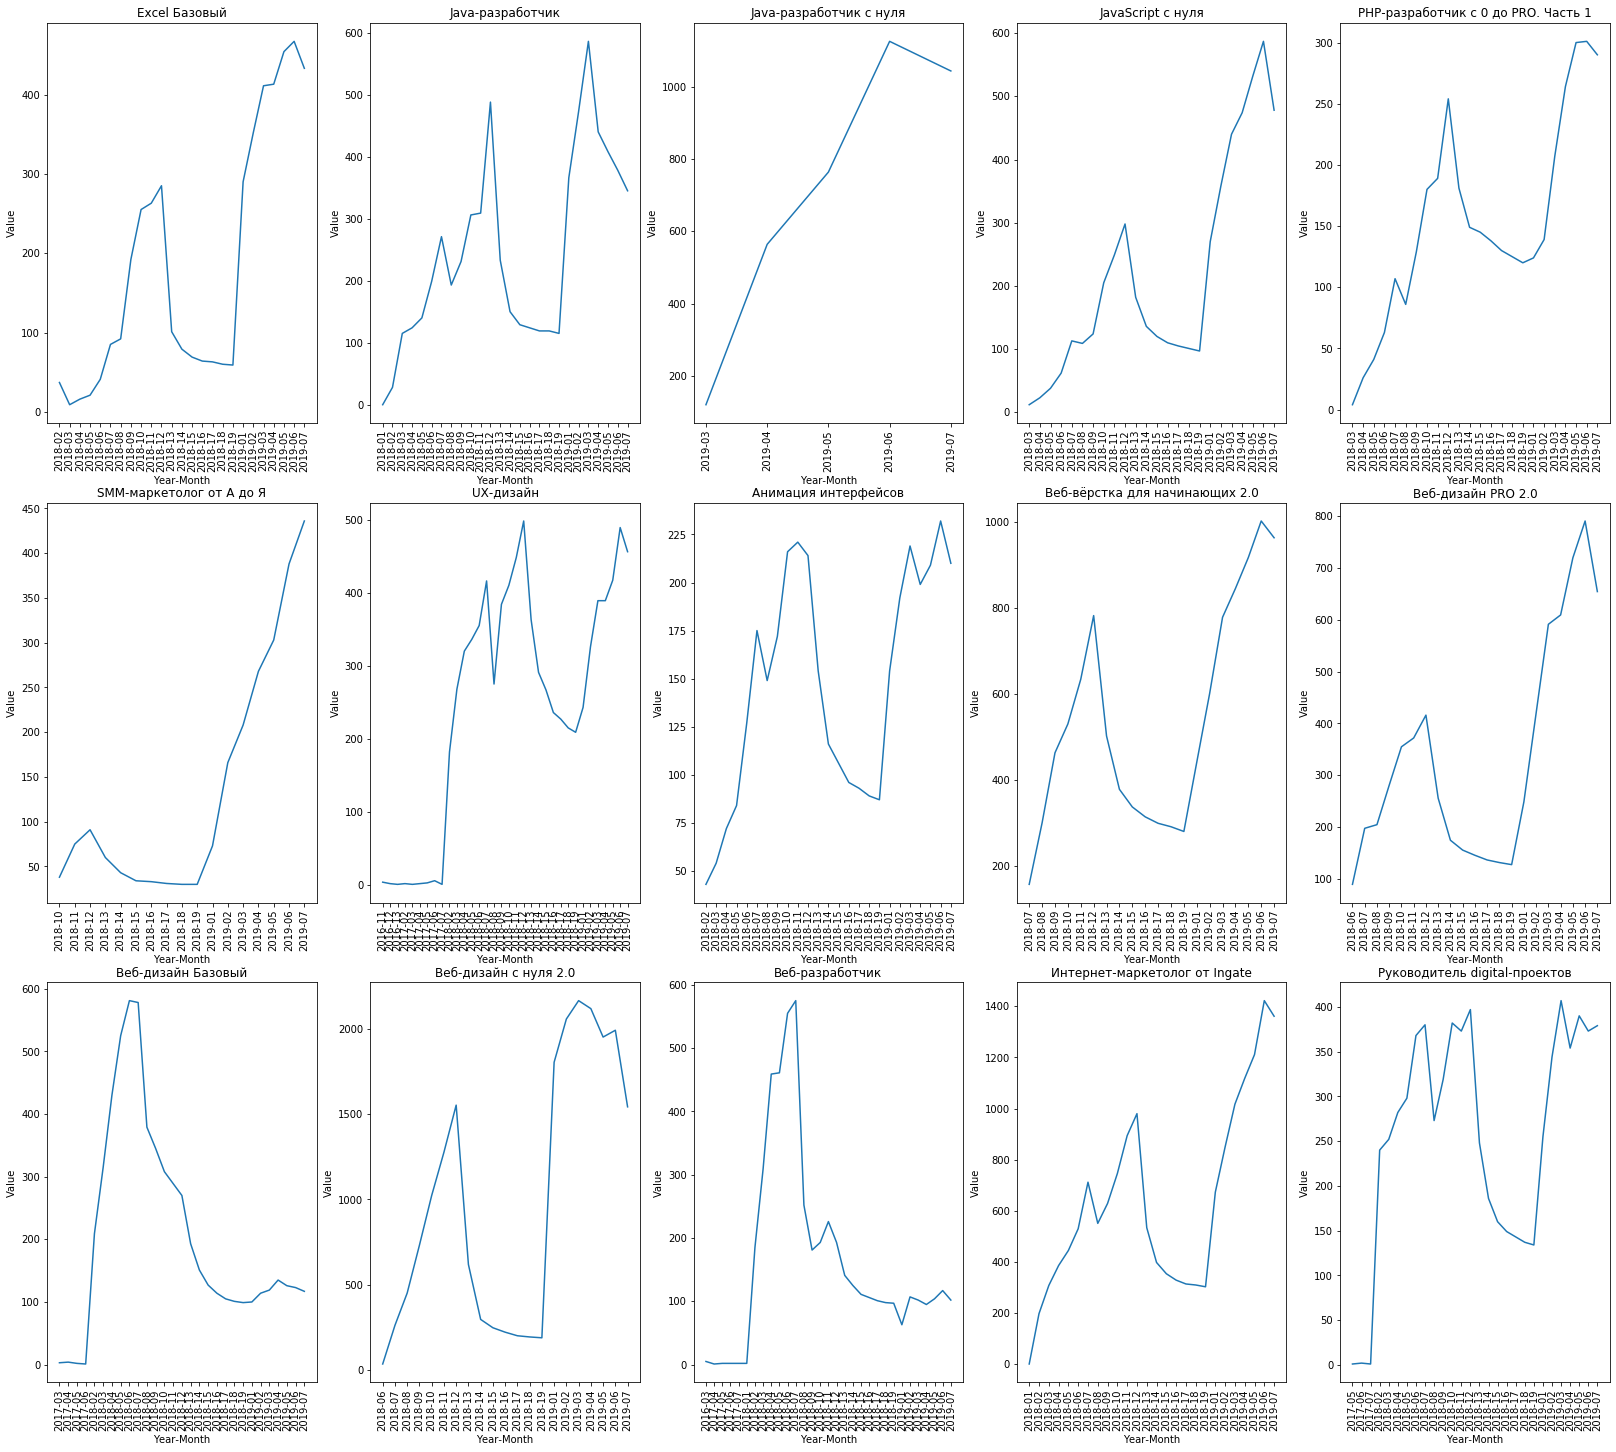

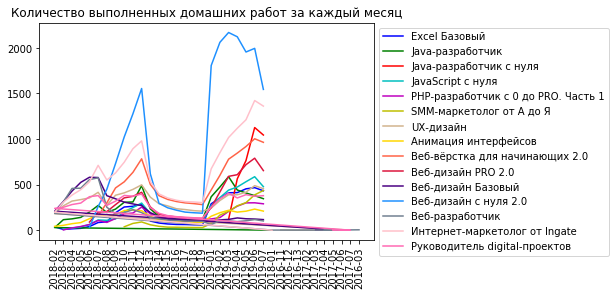

In [9]:
# Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю
# (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно).
# Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
# grow = maindat[maindat.is_homework == True].sort_values('start_date').drop_duplicates(subset='student_id')
grow = maindat[maindat.is_homework == True].sort_values('start_date').drop_duplicates(subset='progress_id')
grow['start_date'] = [data[:7] for data in grow['start_date']]
grow = grow[['start_date', 'student_id', 'title']]
grow_gr = grow.groupby(['title', 'start_date']).count().reset_index()
grow_gr = grow_gr.append({"title": 'Excel Базовый', 'start_date': '2018-04', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2016-12', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-01', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-02', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-03', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-07', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-08', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-09', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-10', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-11', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2017-12', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'UX-дизайн', 'start_date': '2018-01', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-04', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-05', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-06', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-07', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-08', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-09', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-10', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-11', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2017-12', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-дизайн Базовый', 'start_date': '2018-01', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-04', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-05', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-06', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-07', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-08', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-09', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-10', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-11', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2016-12', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-01', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-02', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-03', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-05', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-06', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-08', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-09', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-10', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-11', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2017-12', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Веб-разработчик', 'start_date': '2019-04', 'student_id': 0}, ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-07', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-08', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-09', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-10', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-11', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2017-12', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.append({"title": 'Руководитель digital-проектов', 'start_date': '2018-01', 'student_id': 0},
                         ignore_index=True)
grow_gr = grow_gr.sort_values(['title', "start_date"])
print(grow_gr) #результат
print(grow_gr[grow_gr.title == 'Excel Базовый']) #результат Excel базовый
        
# На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков.
# Графики должны иметь заголовки, оси должны быть подписаны.
# Ticks нужно развернуть так, чтобы они были читаемы.
fig = plt.figure(figsize = (30, 27))
for title, i in zip(grow.sort_values('title').drop_duplicates(subset='title')['title'], range(1, 16)):
    subploti = fig.add_subplot(3, 5, i)
    subploti.set_title(title)
    subploti.plot(
        grow_gr[grow_gr.title == title]['start_date'],
        grow_gr[grow_gr.title == title]['student_id']
    )
    subploti.set_xlabel('Month')
    subploti.set_ylabel('Value')
    plt.xticks(rotation='vertical')

# На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов
# в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы.
# График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана.
# Линия для каждого курса должна иметь свой цвет (нужна легенда).
# Рамок у графика быть не должно ⭐
fig, subplot = plt.subplots()
subplot.set_title('Прирост студентов для каждого курса')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(grow.sort_values('title').drop_duplicates(subset='title')['title'], colors):
    subplot.plot(grow_gr[grow_gr.title == title]['start_date'],
                 grow_gr[grow_gr.title == title]['student_id'],
                 color=color,
                 label=title)
plt.xticks(rotation='vertical')
subplot.legend(bbox_to_anchor=(1, 1))
plt.show() 

# Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю
# (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса.
# Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой
# (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
hwdat = maindat[maindat.is_homework == True][['progress_id', 'start_date',
                                              'finish_date', 'title']].sort_values('start_date').fillna('2019-07')
hwdat['start_date'] = [date[:7] for date in hwdat['start_date']]
hwdat['finish_date'] = [date[:7] for date in hwdat['finish_date']]
for index, row in hwdat.iterrows():
    if row[1] != row[2]:
        sy = int(row[1][:4])
        sm = int(row[1][5:7])
        ey = int(row[2][:4])
        em = int(row[2][5:7])
        rm = em - sm
        if rm < 0:
            rm += 12
        if sm != em:
            for i in range(1, rm+1):
                smn = sm + i
                if smn < 10 and em < 10:
                    hwdat = hwdat.append({'progress_id':row[0], 'start_date':'{}-0{}'.format(sy, smn),
                                      "finish_date":'{}-0{}'.format(ey, em), 'title':row[3]}, ignore_index=True)
                elif smn < 10:
                    hwdat = hwdat.append({'progress_id':row[0], 'start_date':'{}-0{}'.format(sy, smn),
                                      "finish_date":'{}-{}'.format(ey, em), 'title':row[3]}, ignore_index=True)
                elif em < 10:
                    hwdat = hwdat.append({'progress_id':row[0], 'start_date':'{}-{}'.format(sy, smn),
                                      "finish_date":'{}-0{}'.format(ey, em), 'title':row[3]}, ignore_index=True)
                else:
                    hwdat = hwdat.append({'progress_id':row[0], 'start_date':'{}-{}'.format(sy, smn),
                                      "finish_date":'{}-{}'.format(ey, em), 'title':row[3]}, ignore_index=True)
        syo = int(row[1][:4])
        smo = int(row[1][5:7])
        eyo = int(row[2][:4])
        emo = int(row[2][5:7])
        if syo != eyo and smo > 12:
            smon = smo - 12
            if smon < 10:
                hwdat.loc[index, 'start_date'] = '{}-0{}'.format(eyo, smon)
            else:
                hwdat.loc[index, 'start_date'] = '{}-{}'.format(eyo, smon)
hwdat = hwdat[['progress_id', 'start_date', 'title']]
print(hwdat.groupby(['title', 'start_date']).count()) #результат
print(hwdat[hwdat.title == 'Excel Базовый'].groupby(['title', 'start_date']).count()) #результат Excel базовый               
      
# Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны.
# Ticks нужно развернуть так, чтобы они были читаемы
fig = plt.figure(figsize = (28, 25))
hwdat_gr = hwdat.groupby(['title', 'start_date']).count().reset_index()
for title, i in zip(hwdat.sort_values('title').drop_duplicates(subset='title')['title'], range(1, 16)):
    subploti = fig.add_subplot(3, 5, i)
    subploti.set_title(title)
    subploti.plot(
        hwdat_gr[hwdat_gr.title == title]['start_date'],
        hwdat_gr[hwdat_gr.title == title]['progress_id']
    )
    subploti.set_xlabel('Year-Month')
    subploti.set_ylabel('Value')
    plt.xticks(rotation='vertical')

# Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике.
# Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок.
# Ось, отражающая количество прогрессов, должна быть подписана.
# Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
fig, subplot = plt.subplots()
subplot.set_title('Количество выполненных домашних работ за каждый месяц')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(hwdat.sort_values('title').drop_duplicates(subset='title')['title'], colors):
    subplot.plot(hwdat_gr[hwdat_gr.title == title]['start_date'],
                 hwdat_gr[hwdat_gr.title == title]['progress_id'],
                 color=color,
                 label=title)
plt.xticks(rotation='vertical')
subplot.legend(bbox_to_anchor=(1, 1))
plt.show()

# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)
# На курс "Интернет-маркетолог" пришло больше всего людей за первое полугодие.
# Даже не смотря на падение роста, на этот курс приходило больше всего людей.
# Больше всего ДЗ выполнено на курсе "Веб-дизайн с нуля 2.0".

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

C:\Users\Nikita\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


                             title  module_number    min  \
0                    Excel Базовый              1 0 days   
1                    Excel Базовый              2 0 days   
2                    Excel Базовый              3 0 days   
3                    Excel Базовый              4 0 days   
4                    Excel Базовый              5 0 days   
..                             ...            ...    ...   
185  Руководитель digital-проектов             12 0 days   
186  Руководитель digital-проектов             13 0 days   
187  Руководитель digital-проектов             14 0 days   
188  Руководитель digital-проектов             15 0 days   
189  Руководитель digital-проектов             16 0 days   

                         max                    mean                  median  
0   183 days 17:57:52.247793  5 days 23:47:54.195384  2 days 07:24:50.049678  
1   184 days 06:27:48.841839  4 days 07:20:42.029637  1 days 20:24:06.134843  
2    89 days 03:11:50.758958  3 days 09:55

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


title                          month
Excel Базовый                  01       2 days 05:15:40.334257
                               02       2 days 05:46:39.750756
                               03       2 days 19:52:58.386801
                               04       1 days 22:33:43.881223
                               05       2 days 09:55:16.146759
                                                 ...          
Руководитель digital-проектов  08      13 days 13:27:50.949325
                               09      10 days 02:37:07.207776
                               10       4 days 20:23:30.326083
                               11       6 days 00:05:40.666425
                               12       7 days 22:30:12.242404
Length: 171, dtype: timedelta64[ns]


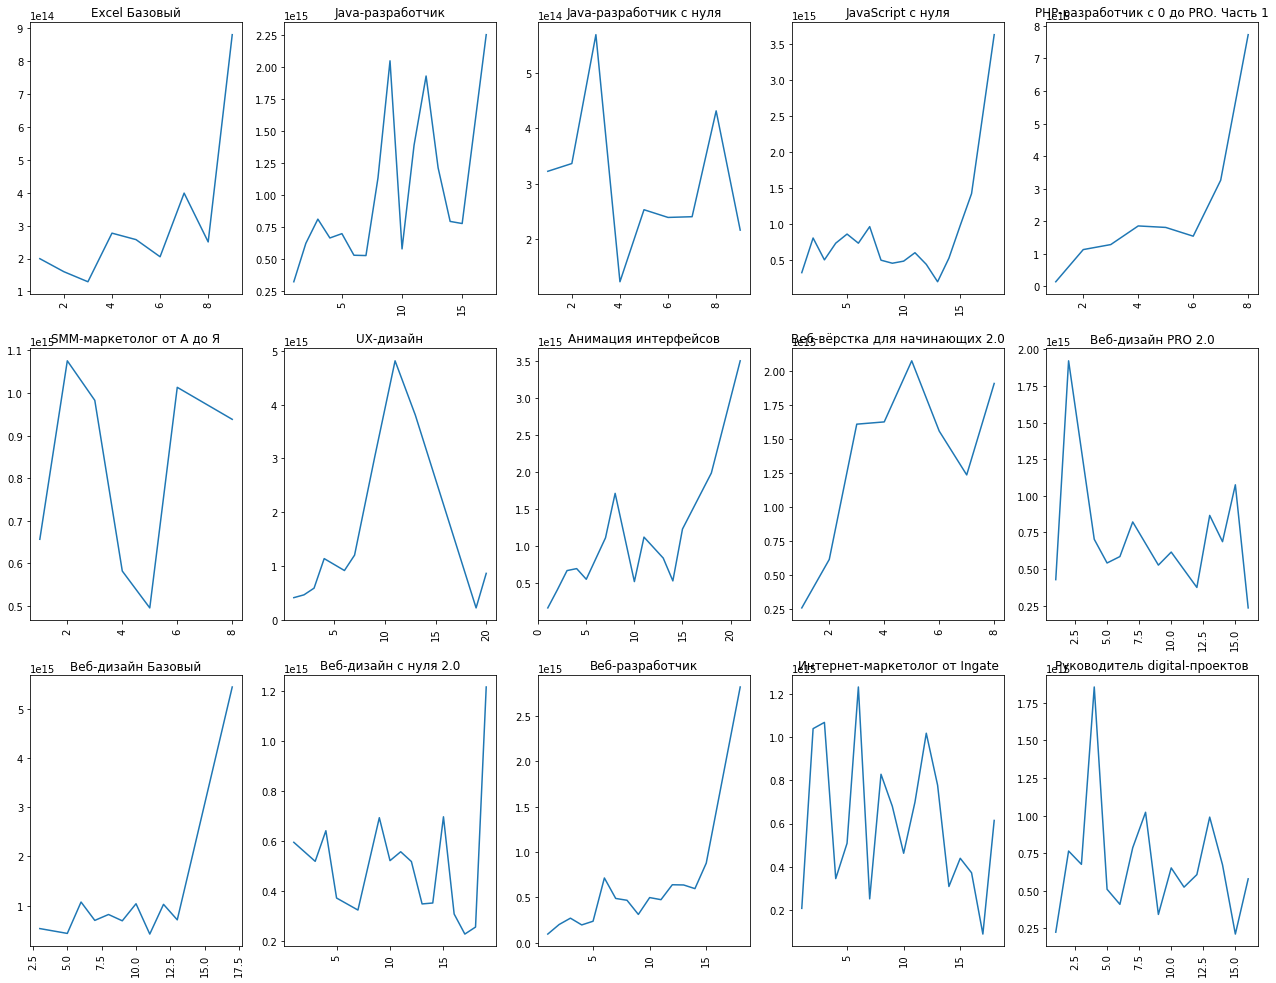

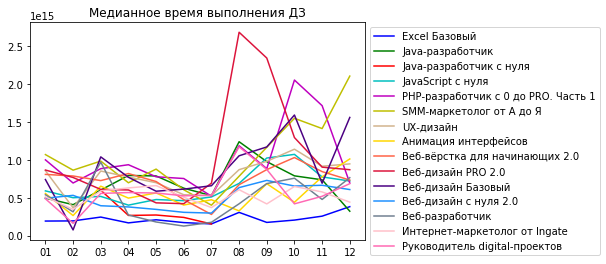

In [3]:
# Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля
# (разность между временем начала и окончания выполнения домашней работы) для каждого курса.
# Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и
# временем окончания выполнения последней домашней работы в модуле
maindat['start_date'] = pd.to_datetime(maindat['start_date'])
maindat['finish_date'] = pd.to_datetime(maindat['finish_date'])
hwtime = maindat[maindat.is_homework == True].dropna()
hw = hwtime[['progress_id', 'module_number', 'start_date', 'finish_date', 'title']]
for index, row in hw.iterrows():
    if row[2] > row[3]:
        hw.loc[index, 'start_date'] = row[3]
hw['time_spend'] = hw['finish_date'] - hw['start_date']
hw.sort_values('time_spend')
hwgroup = hw[['module_number', 'title', 'time_spend']]
a = hwgroup.groupby(['title', 'module_number']).agg(['min', 'max']).reset_index()
c = hwgroup.groupby(['title', 'module_number']).apply(np.mean).drop(columns='module_number').reset_index()
d = hwgroup.groupby(['title', 'module_number']).apply(np.median).to_frame().reset_index()
a.columns = ['title', 'module_number', 'min', 'max']
hwgr = a.merge(c, on=['title', 'module_number'])
hwgr = hwgr.merge(d, on=['title', 'module_number'])
hwgr.columns = ['title', 'module_number', 'min', 'max', 'mean', 'median']
print(hwgr)

# На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса.
# 15 графиков. Графики должны иметь заголовки
fig = plt.figure(figsize = (22, 17))
hw_graph = hwgroup.groupby(['title', 'module_number']).apply(np.median).reset_index()
for title, i in zip(hwgroup.sort_values('title').drop_duplicates(subset='title')['title'], range(1, 16)):
    subploti = fig.add_subplot(3, 5, i)
    subploti.set_title(title)
    subploti.plot(hw_graph[hw_graph.title == title]['module_number'],
                  hw_graph[hw_graph.title == title][0])
    plt.xticks(rotation='vertical')

# Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам
# (12 месяцев, январь-декабрь) для каждого курса.
hw_m = hw[['title', 'time_spend']]
hw_m['month'] = [i[5:7] for i in col['start_date']]
print(hw_m.groupby(['title', 'month']).apply(np.median)) #результат

# На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с
# медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок.
# Ось, отражающая время прохождения, должна быть подписана.
# Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
fig, subplot = plt.subplots()
hw_m_gr = hw_m.groupby(['title', 'month']).apply(np.median).reset_index()
subplot.set_title('Медианное время выполнения ДЗ')
colors = ['b', 'g', 'r', 'c', 'm',
          'y', 'tan', 'gold', 'tomato', 'crimson',
          'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, color in zip(hw_m.sort_values('title').drop_duplicates(subset='title')['title'], colors):
    subplot.plot(hw_m_gr[hw_m_gr.title == title]['month'],
                 hw_m_gr[hw_m_gr.title == title][0],
                 color=color,
                 label=title)
subplot.legend(bbox_to_anchor=(1, 1))
plt.show()

# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)
# Дольше всего ДЗ выполняются с июля по сентябрь.
# По курсу "Веб-дизайн PRO 2.0" самые тяжелые ДЗ. 

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

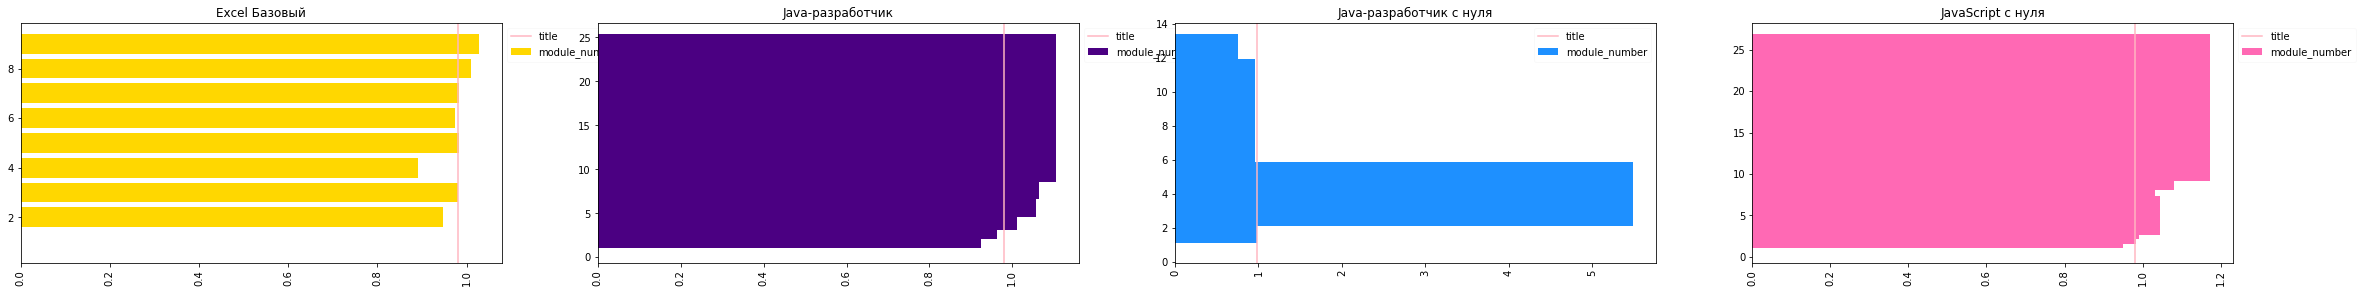

In [36]:
# Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе.
# Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле
# (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов,
# сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
conver = conv[conv.is_homework == True]
conversion = conver[['module_number', 'status', 'student_id', 'title', 'field']].sort_values(['title', 'module_number'])
conv_data = conversion.groupby(['title', 'module_number', 'status']).count().reset_index()
conv_dat = conv_data[conv_data.status == 'done'].drop([27, 75, 109, 165, 189, 214, 253, 294, 325, 373, 411, 472, 521, 584, 639])
conv_da = conv_dat.groupby(['title', 'module_number'])['student_id'].sum().reset_index()
conv_da['module_number'] = [i + 1 for i in conv_da['module_number']]
ch = conv_data[(conv_data.status == 'start') | (conv_data.status == 'wait') | (conv_data.status == 'done') | 
               (conv_data.status == 'fail')].groupby(['title', 'module_number'])['student_id'].sum().reset_index()
for title in conv_da.drop_duplicates('title')['title']:
    conv_da = conv_da.append({'title':title, 'module_number':1, 'student_id':0}, ignore_index=True)    
conv_da = conv_da.sort_values(['title', 'module_number'])
conv_da = conv_da.reset_index()
ch = ch.drop([82, 84, 87, 90, 91]).reset_index()
conv_da = conv_da.drop([82, 84, 89, 90]).reset_index()
r = conv_data[['title', 'module_number']].drop_duplicates().drop([271, 277, 283, 291, 294]).reset_index()
r = r.drop(columns='index')
r['res'] = ch['student_id'] / conv_da['student_id']
r = r.replace([np.inf, -np.inf], 0)
# print(r)

# # Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе.
# # График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
# fig, subplot = plt.subplots()
# subplot.set_title('Конверсия перехода студентов')
# subplot.bar(r['title'],
#             r['res'])
# plt.xticks(rotation='vertical')
# plt.show()

# # Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart,
# # отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков.
# # Графики должны иметь заголовки. Ticks должны содержать номер и название модуля.
# # Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда).
# # Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса.
# # У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
field = conversion[['title', 'field']]
field = field.drop_duplicates()
r = r.merge(field, on='title')
r.drop_duplicates('field')
fig = plt.figure(figsize = (50, 15))
colors = ['gold', 'indigo', 'dodgerblue', 'hotpink']
# colors = ['b', 'g', 'r', 'c', 'm',
#           'y', 'tan', 'gold', 'tomato', 'crimson',
#           'indigo', 'dodgerblue', 'slategray', 'pink', 'hotpink']
for title, i, field, c in zip(r.drop_duplicates(subset='title')['title'], range(1, 16), field['field'], colors):
    subploti = fig.add_subplot(3, 5, i)
    subploti.set_title(title)
    subploti.barh(r[(r.title == title) & (r.field == field)]['module_number'],
                  r[(r.title == title) & (r.field == field)]['res'],
                  color=c)
    plt.xticks(rotation='vertical')
    plt.axvline(r.groupby('title').agg('median')['res'][0], color='lightpink')
    subploti.legend(r[r.field == field], bbox_to_anchor=(1, 1), framealpha=0.1)
# for title, i, c in zip(r.drop_duplicates(subset='title')['title'], range(1, 16), colors):
#     subploti = fig.add_subplot(3, 5, i)
#     subploti.set_title(title)
#     if 
#     subploti.barh(r[r.title == title]['module_number'],
#                   r[r.title == title]['res'],
#                   color=c)
#     plt.xticks(rotation='vertical')
#     plt.axvline(r.groupby('title').agg('median')['res'][0], color='lightpink')
#     subploti.legend(r[r.title == title], bbox_to_anchor=(1, 1), framealpha=0.1)

# На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)
# Лучшая конверсия на курсе java разработчик с нуля, худшая на анимация интерфейсов.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


